In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import seaborn as sns

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [33]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Create inspector & connect to engine
inspector = inspect(engine)

# Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Sort the DataFrame values by `date`.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [10]:
# Get data column name/types for ref.
measurement_columns = inspector.get_columns('Measurement')
for columns in measurement_columns: 
    print(columns["name"], columns["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# 1). Finding the last date in the data - - select only date/prcp values
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The last existing date in the Measurement data was: {last_date}")

# 2). Finding the last 12 months FROM last date in data (last 12 mo - 365d) 
last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f"12 months from last existing date: {last_12_months}")

# 3). Perform a query to retrieve the data and precipitation scores for 'last12mo'
last_year_precipitation = session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date >= last_12_months).order_by(Measurement.date).all()
    # last_year_precipitation

# 4). Save the query results as a Pandas DataFrame and set the index to the date column
prcp_1617_df = pd.DataFrame(last_year_precipitation, columns=['Date', 'Precipitation'])

prcp_1617_df.sort_values(by=['Date'])
prcp_1617_df

The last existing date in the Measurement data was: ('2017-08-23',)
12 months from last existing date: 2016-08-23


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


### Precipitation Plot:

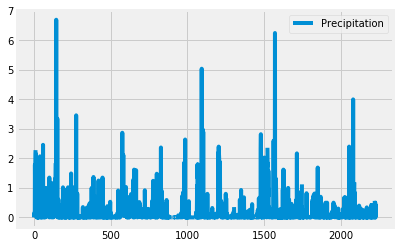

In [37]:
# 6). Plot the results using the DataFrame `plot` method.
plt.title = ("Precipitation from 2016-08-23 to 2016-08-23")
plt.xlabel = ("Date")
plt.ylabel = ("Precipitation")
plt.legend = ("Precipitation")
prcp_1617_df.plot()
plt.savefig('Images/Precipitation_Plot.png')


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_1617_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order.

  * Which station has the highest number of observations?
  
  * Hint: You may need to use functions such as `func.min`, `func.max`, `func.avg`, and `func.count` in your queries.
  

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

In [14]:
# Get Station columns
station_columns = inspector.get_columns('Station')
for columns in station_columns:
    print(columns["name"], columns["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# 1). Design a query to calculate the total number of stations.
stations_total = session.query(Station).count()
print(f"The total number of stations in this data set is: {stations_total}")

The total number of stations in this data set is: 9


In [16]:
# 2). Design a query to find the most active stations.
    # List the stations and observation counts in descending order.
    # Which station has the highest number of observations?
active_stations_locations = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

print(f"Most active stations:")
active_stations_df = pd.DataFrame(active_stations_locations, columns=['Station Name', "Observation Count"])
active_stations_df

Most active stations:


,Station Name,Observation Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [17]:
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    limit(1).scalar()

sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*sel).\
    filter(Measurement.station == most_active_station).\
    group_by(Measurement.station).\
    all()

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
most_active_station

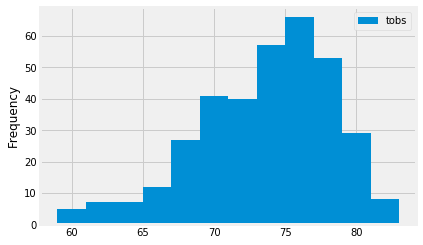

<Figure size 432x288 with 0 Axes>

In [38]:
# 3). Design a query to retrieve the last 12 months of temperature observation data (tobs).
    # Filter by the station with the highest number of observations.
    # Plot the results as a histogram with `bins=12`.

measurement_tobs = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date>= last_12_months).statement

tobs_df = pd.read_sql(measurement_tobs, conn)
tobs_df.plot(kind='hist', bins=12)
plt.show()

plt.savefig('Images/Histogram.png')